# **Proyek Machine Learning & Deep Learning - Economy Classification**

# **1. Data Understanding**

## a. Sumber Dataset

Adapun untuk data yang digunakan pada projek kali ini berasal dari [Kaggle](https://github.com/marceloreis/HTI/tree/master), Socio-Economic of Indonesia in 2021 yang bersumber dari data terbuka milik Badan Pusat Statistik (BPS), dalam dataset ini terdapat beberapa variabel sosial-ekonomi Indonesia pada tahun 2021.

In [1]:
!pip install imblearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE
from IPython import get_ipython
from IPython.display import display

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/pyytryy/Machine_Learning_Terapan/main/Submission_Predictive_Analytics/2021socio_economic_indonesia.csv")
df

,province,cities_reg,poorpeople_percentage,reg_gdp,life_exp,avg_schooltime,exp_percap
0,Aceh,Simeulue,18.98,2.275,65.240,9.48,7148
1,Aceh,Aceh Singkil,20.36,2.425,67.355,8.68,8776
2,Aceh,Aceh Selatan,13.18,5.531,64.360,8.88,8180
3,Aceh,Aceh Tenggara,13.41,5.063,68.155,9.67,8030
4,Aceh,Aceh Timur,14.45,10.616,68.705,8.21,8577
...,...,...,...,...,...,...,...
509,Papua,Puncak,36.26,1.438,66.060,2.16,5412
510,Papua,Dogiyai,28.81,1.356,65.845,4.94,5415
511,Papua,Intan Jaya,41.66,1.274,65.580,3.09,5328
512,Papua,Deiyai,40.59,1.439,65.355,3.25,4673


## b. Informasi Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   province               514 non-null    object 
 1   cities_reg             514 non-null    object 
 2   poorpeople_percentage  514 non-null    float64
 3   reg_gdp                514 non-null    float64
 4   life_exp               514 non-null    float64
 5   avg_schooltime         514 non-null    float64
 6   exp_percap             514 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 28.2+ KB


## c. Menguraikan Seluruh Fitur Pada Dataset



Fitur-fitur pada dataset 'Socio-Economic of Indonesia in 2021' adalah sebagai berikut:

1. province: Nama provinsi di Indonesia (tipe data kategori).
2. cities_reg: Nama kabupaten/kota yang termasuk dalam provinsi tersebut (tipe data kategori).
3. poorpeople_percentage: Persentase penduduk miskin di wilayah tersebut (dalam persentase).
4. reg_gdp: Produk Domestik Regional Bruto (PDRB) dalam satuan miliar rupiah
5. life_exp: Angka Harapan Hidup (AHH) dalam tahun.
6. avg_schooltime: Rata-rata lama sekolah (dalam tahun), mencerminkan capaian pendidikan.
7. exp_percap: Pengeluaran per kapita, yaitu rata-rata pengeluaran individu di wilayah tersebut (dalam ribuan rupiah).

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

,0
province,0
cities_reg,0
poorpeople_percentage,0
reg_gdp,0
life_exp,0
avg_schooltime,0
exp_percap,0


In [7]:
df.describe()

,poorpeople_percentage,reg_gdp,life_exp,avg_schooltime,exp_percap
count,514.000000,514.000000,514.000000,514.000000,514.000000
mean,12.273152,34.798333,69.619076,8.436615,10324.787938
std,7.458703,84.155498,3.455911,1.630842,2717.144186
min,2.380000,1.042000,55.370000,1.420000,3976.000000
25%,7.150000,5.587500,67.336250,7.510000,8574.000000
50%,10.455000,13.068500,69.922500,8.305000,10196.500000
75%,14.887500,28.849500,72.018750,9.337500,11719.000000
max,41.660000,819.000000,77.855000,12.830000,23888.000000


Informasi yang didapatkan dari dataset ini yakni:

1. Dataset ini terdiri dari 514 data
2. Dataset ini terdiri dari 7 fitur
3. Tidak terdapat data yang kosong
4. Tidak terdapat data yang duplikat
5. Rangkuman Statistik Deskriptif
-  poorpeople_percentage (Persentase Penduduk Miskin):
- -  Rata-rata: 12.27%
- -  Minimum: 2.38%, Maksimum: 41.66%
- -  Sebaran (std): 7.46%
- -  Sebagian besar daerah memiliki penduduk miskin kurang dari 15%, namun terdapat wilayah ekstrem hingga lebih dari 40%.

-  reg_gdp (PDRB dalam miliar rupiah):
- -  Rata-rata: 34.80 miliar
- -  Minimum: 1.04 miliar, Maksimum: 819 miliar
- -  Sebaran sangat besar (std: 84.16)
- -  Menunjukkan ketimpangan ekonomi antar daerah dengan 75% wilayah memiliki PDRB di bawah 28.85 miliar.

-  life_exp (Angka Harapan Hidup):
- -  Rata-rata: 69.62 tahun
- -  Minimum: 55.37 tahun, Maksimum: 77.86 tahun
- -  Relatif homogen (std: 3.46)
- -  Sebagian besar provinsi memiliki AHH antara 67 – 72 tahun.

-  avg_schooltime (Rata-rata Lama Sekolah):
- -  Rata-rata: 8.44 tahun (jika dibulatkan maka sekitar SMP kelas 2)
- -  Minimum: 1.42 tahun, Maksimum: 12.83 tahun
- -  Ada ketimpangan, namun mayoritas wilayah berada di kisaran 7.5 – 9.3 tahun.

-  exp_percap (Pengeluaran Per Kapita):
- -  Rata-rata: Rp10.324.788 per tahun (~860 ribu/bulan)
- -  Minimum: Rp3.976.000, Maksimum: Rp23.888.000
- -  Penyebaran cukup besar (std: Rp2.717.000), menunjukkan ketimpangan daya beli antar wilayah.

## d. Visualisasi Data

Akan diakukan visualisasi data untuk membantu kita dalam mengenali data yang sedang ditangani dan membuat strategi analisis yang paling efisien



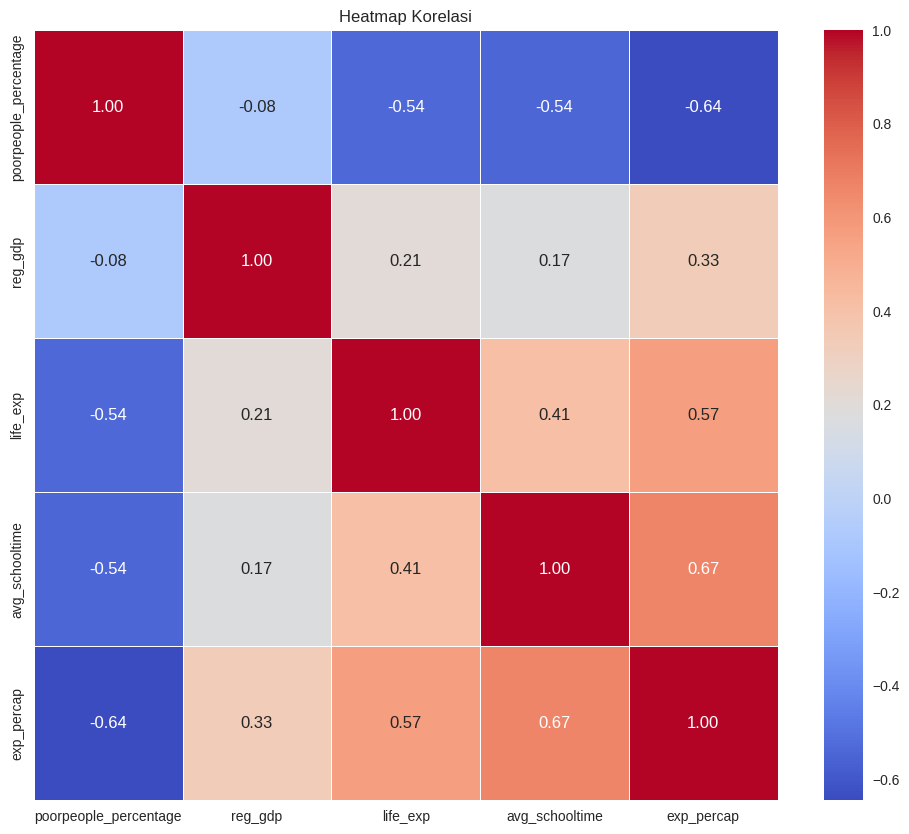

In [8]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()


**Insight Heatmap**

1. Rata-rata lama sekolah berkorelasi **Positif** pengeluaran per kapita (0.67) dan angka harapan hidup (0.41)
> Semakin tinggi rata-rata lama sekolah di suatu wilayah, maka akan semakin tinggi pengeluaran per kapita dan angka harapan hidup. Ini menunjukkan bahwa pendidikan berpotensi menjadi indikator umum kualitas hidup dan daya beli masyarakat.

2. Persentase penduduk miskin berkorelasi **Negatif** dengan rata-rata lama sekolah (-0.54), angka harapan hidup (-0.54) dan pengeluaran per kapita (-0.64)
> Di wilayah dengan pendidikan lebih tinggi, angka kemiskinan cenderung lebih rendah, dan kualitas hidup lebih baik.

3. Pengeluaran per kapita berkorelasi **Positif** dengan angka harapan hidup (0.57) dan dengan PDRB dalam miliar rupiah (0.33)
> Pengeluaran per kapita berpotensi menjadi indikator umum kesejahteraan ekonomi, berkaitan erat dengan PDRB dan harapan hidup.

<ipython-input-9-438c787ff66e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combined.values, y=combined.index, palette=colors)


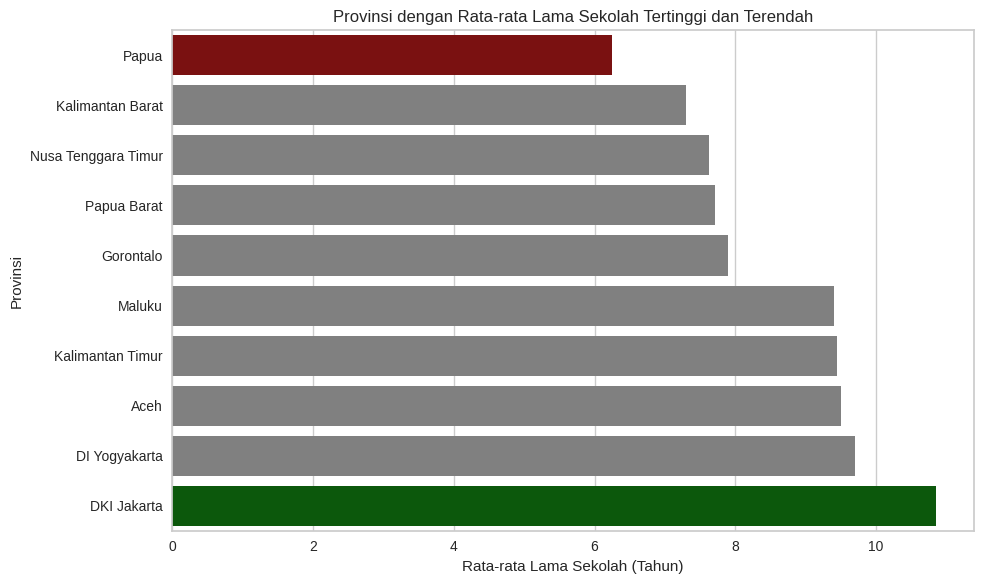

In [9]:
avg_school_by_prov = df.groupby('province')['avg_schooltime'].mean().sort_values()
lowest = avg_school_by_prov.head(5)
highest = avg_school_by_prov.tail(5)

combined = pd.concat([lowest, highest])

colors = ['gray'] * len(combined)
colors[0] = 'darkred'      # paling rendah
colors[-1] = 'darkgreen'   # paling tinggi

plt.figure(figsize=(10,6))
sns.barplot(x=combined.values, y=combined.index, palette=colors)

plt.title('Provinsi dengan Rata-rata Lama Sekolah Tertinggi dan Terendah')
plt.xlabel('Rata-rata Lama Sekolah (Tahun)')
plt.ylabel('Provinsi')
plt.tight_layout()
plt.show()


**Insight**

Diperoleh 5 provinsi dengan Rata-rata Lama Sekolah tertinggi yakni DKI Jakarta, DI Yogyakarta, Aceh, Kalimantan Timur dan Maluku. sedangkan 5 provinsi dengan Rata-rata Lama Sekolah terendah yakni Papua, Kalimantan Barat, Nusa Tenggara Timur, Papua Barat, dan Gorontalo.

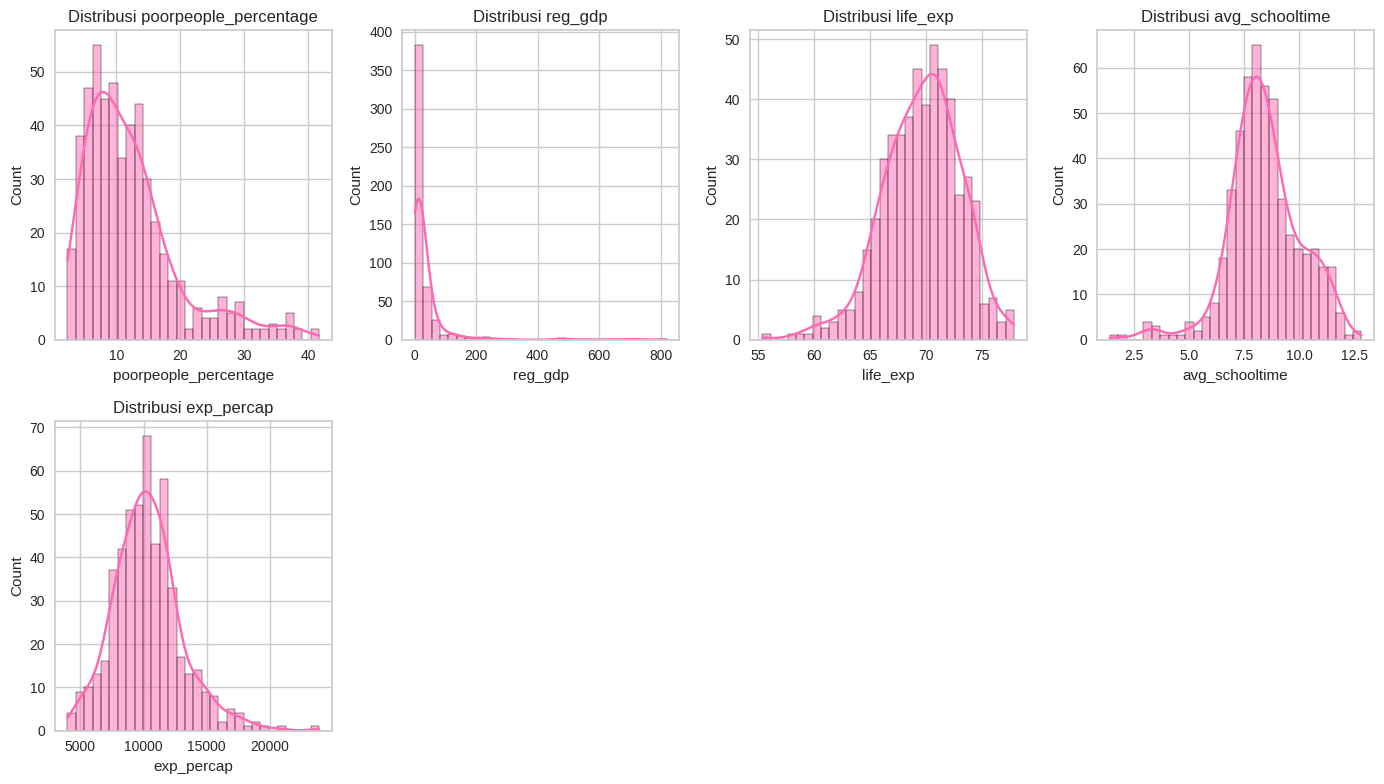

In [10]:
num_features = df.select_dtypes(include=[np.number])
num_cols = len(num_features.columns)
num_rows = (num_cols + 3) // 4

plt.figure(figsize=(14, 4 * num_rows))

for i, column in enumerate(num_features.columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='#FF69B4')
    plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

**Insight**

1. poorpeople_percentage (Persentase Penduduk Miskin): distribusi: **Right-skewed**

2. reg_gdp (PDRB dalam miliar rupiah): distribusi: Sangat **right-skewed** (ada outlier ekstrem)

3. life_exp (Angka Harapan Hidup): distribusi: **Hampir normal** (sedikit skew kiri)

4. avg_schooltime (Rata-rata Lama Sekolah): distribusi: **Hampir normal** (sedikit skew kanan dan outlier)

5. exp_percap (Pengeluaran Per Kapita): distribusi: **Right-skewed** (banyak nilai ekstrem tinggi)


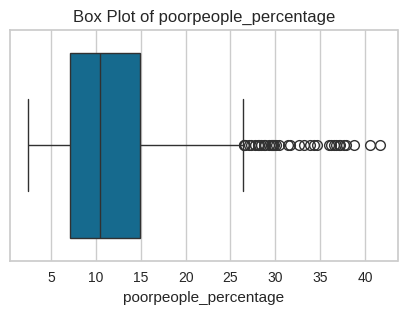

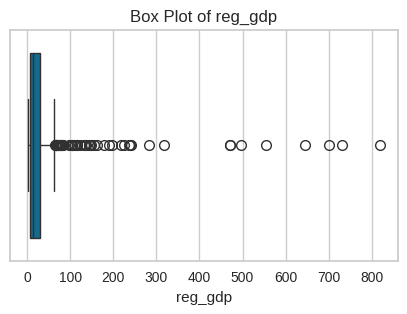

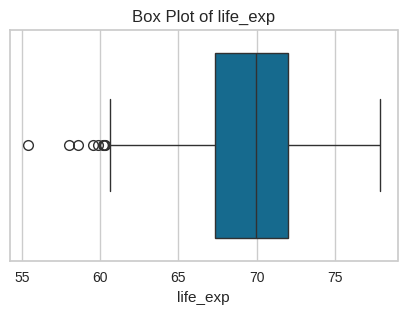

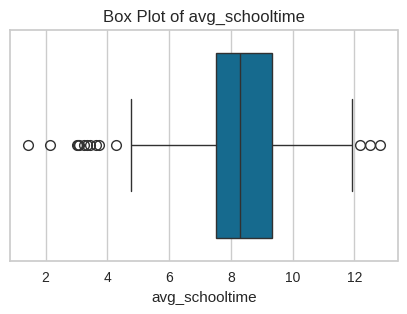

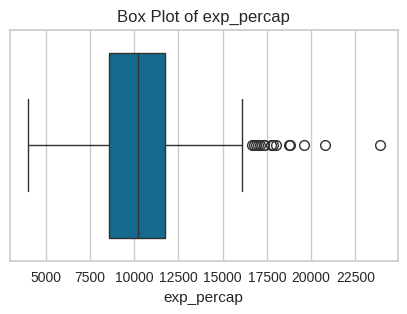

In [11]:
for feature in num_features:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

**Insight**

Pada beberapa fitur terdapat banyak outlier, perlu penanganan

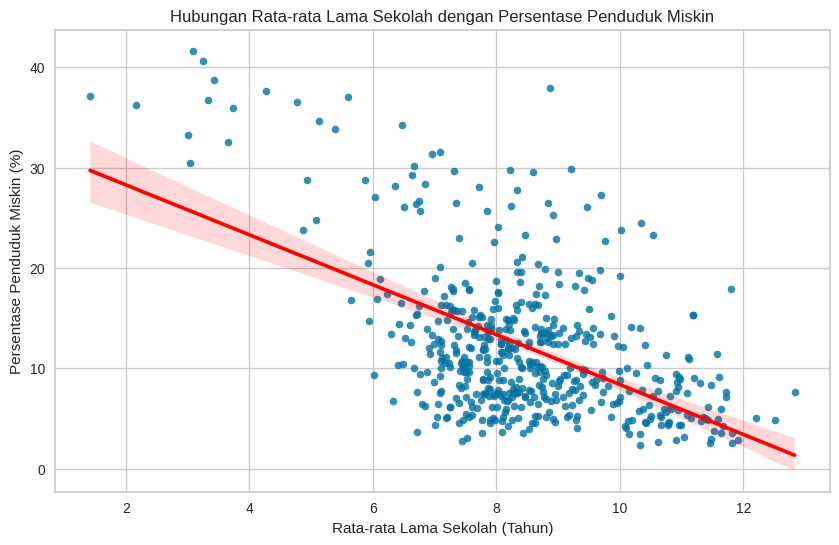

In [12]:
# @title Scatter Plot
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='avg_schooltime', y='poorpeople_percentage', scatter_kws={'s': 30}, line_kws={'color': 'red'})
plt.title('Hubungan Rata-rata Lama Sekolah dengan Persentase Penduduk Miskin')
plt.xlabel('Rata-rata Lama Sekolah (Tahun)')
plt.ylabel('Persentase Penduduk Miskin (%)')
plt.grid(True)
plt.show()

**Insight Scatter Plot Hubungan Rata-rata Lama Sekolah dengan Persentase Penduduk Miskin**

1. Wilayah dengan pendidikan rendah (rata-rata lama sekolah < 6 tahun) cenderung memiliki tingkat kemiskinan yang sangat tinggi (bisa >30%).

2. Wilayah dengan lama sekolah > 9 tahun hampir seluruhnya memiliki kemiskinan di bawah 15%, bahkan sebagian besar kurang dari 10%.

Dari scatter plot diperoleh bahwa semakin tinggi persentase penduduk miskin di suatu daerah, maka semakin rendah rata-rata lama sekolah. Hal ini menunjukkan bahwa kemiskinan menjadi faktor penghambat utama terhadap keberlangsungan pendidikan. Oleh karena itu, peningkatan akses dan dukungan pendidikan di daerah-daerah miskin menjadi sangat penting untuk memutus rantai kemiskinan dalam jangka panjang

# **2. Data Preparation**

Berdasarkan hasil EDA diketahui bahwa dataset yang digunakan tidak terdapat missing value, duplikat data sehingga tidak perlu ditangani, namun terdapat data yang outlier sehingga yang ditangani hanya dari sisi outlier, karena clustering dengan metode K-Means sangat sensitif dengan outlier sehingga perlu ditangani lebih lanjut

## a. Penanganan Outlier

Pada tahapan ini akan dilakukan penanganan outlier dengan menggunakan RobustScaler dikarenakan dataset terlihat skewed. RobustScaler bekerja dengan median dan IQR (interquartile range) daripada mean dan standar deviasi sehingga cocok untuk data yang memiliki nilai ekstrim (outlier)

In [13]:
# @title RobustScaler
df_transformed = df.copy()

num_features = ['reg_gdp', 'exp_percap', 'poorpeople_percentage', 'life_exp', 'avg_schooltime']

X = df_transformed[num_features]

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=num_features)

df_transformed[num_features] = X_scaled_df

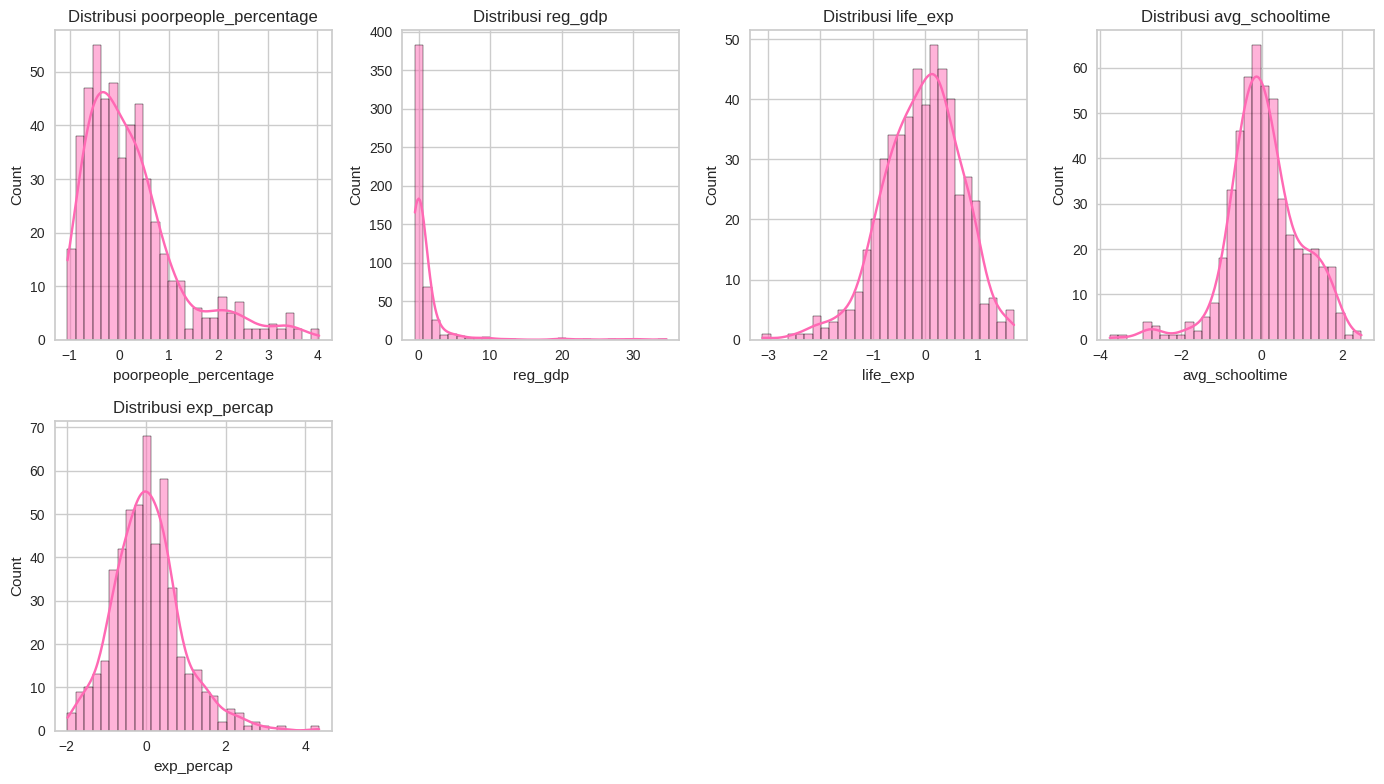

In [14]:
# @title Pemeriksaan Outlier
num_features = df_transformed.select_dtypes(include=[np.number])
num_cols = len(num_features.columns)
num_rows = (num_cols + 3) // 4

plt.figure(figsize=(14, 4 * num_rows))

for i, column in enumerate(num_features.columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(df_transformed[column], bins=30, kde=True, color='#FF69B4')
    plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

**Insight**

Didapatkan distribusi dari setiap fitur terlihat normal setelah dilakukan penanganan dengan metode Log-transform dan capping. Dataset siap digunakan untuk modeling

## b. Dataset dengan Fitur Terpilih

Dilakukan salinan dari dataset awal agar mencegah terjadinya pencampuran dalam dataset


1. Dataset baru dengan fitur terpilih = `df_fitur`

2. Dataset awal yang disalin = `df_scaled`

Selanjutnya akan digunakan 2 variabel diatas

In [15]:
# @title Dataset baru
df_scaled = df_transformed.copy()

In [16]:
# @title Fitur terpiih
fitur_terpilih = ['reg_gdp', 'exp_percap', 'poorpeople_percentage', 'life_exp', 'avg_schooltime']

df_fitur = df_scaled[fitur_terpilih]

# **3. Modeling**

Pada tahapan modeling, model yang dibangun dalam proyek ini termasuk dalam kategori unsupervised learning, dengan pendekatan clustering menggunakan algoritma KMeans. Tujuannya adalah untuk mengelompokkan data ke dalam beberapa klaster berdasarkan kemiripan fitur, tanpa menggunakan label atau target tertentu seperti pada klasifikasi.

Sebagai langkah lanjutan, hasil clustering tersebut digunakan sebagai label baru untuk membangun model klasifikasi. Model klasifikasi ini bertujuan untuk memprediksi klaster dari data baru yang masuk di masa mendatang. Dengan demikian, sistem tidak hanya mampu mengelompokkan data historis, tetapi juga dapat melakukan prediksi secara otomatis terhadap data yang belum pernah dilihat sebelumnya.

## A. Clustering (KMeans)

#### a. Model KMeans
1. Dilakukan metode Elbow tanpa cluster diawal untuk melihat grafik metode elbow agar dapat menentukan pemisahan kelompok data.
2. Mengitung Silhouette Score sebagai ukuran kualitas di setiap cluster.

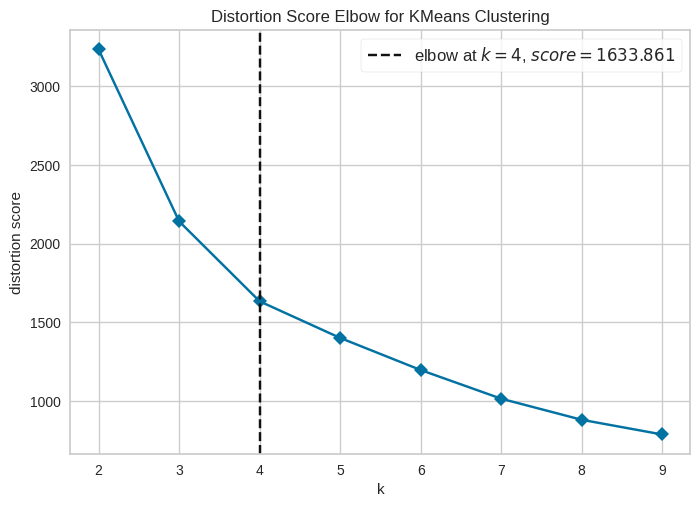

Nilai K optimal menurut Elbow Method: 4


In [17]:
# @title Metode Elbow
kmeans = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric='distortion', timings=False)
visualizer.fit(df_fitur)
visualizer.show()

optimal_k = visualizer.elbow_value_
print(f"Nilai K optimal menurut Elbow Method: {optimal_k}")

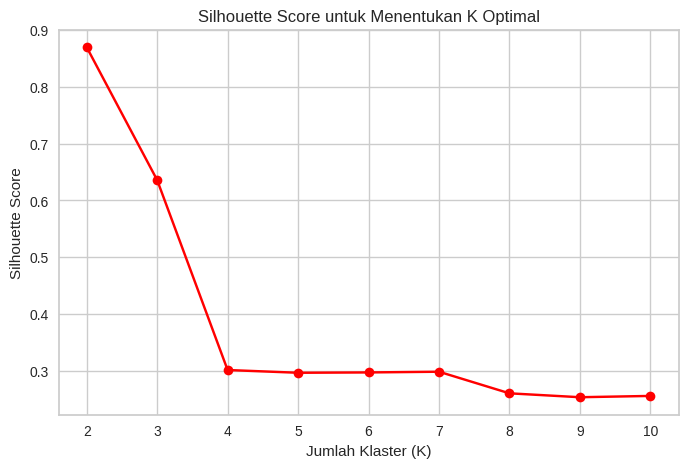

Silhouette Score untuk 2 cluster: 0.8700
Silhouette Score untuk 3 cluster: 0.6358
Silhouette Score untuk 4 cluster: 0.3011
Silhouette Score untuk 5 cluster: 0.2963
Silhouette Score untuk 6 cluster: 0.2968
Silhouette Score untuk 7 cluster: 0.2981
Silhouette Score untuk 8 cluster: 0.2600
Silhouette Score untuk 9 cluster: 0.2532
Silhouette Score untuk 10 cluster: 0.2554


In [18]:
# @title Silhouette Score
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_fitur)
    score = silhouette_score(df_fitur, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color="red")
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan K Optimal')
plt.show()

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_fitur)
    score = silhouette_score(df_fitur, labels)
    print(f"Silhouette Score untuk {k} cluster: {score:.4f}")

**Insight**

Dapat dilihat pada nilai silhouette score dari tiap cluster, nilai berada di bawah 0.7 untuk nilai k dari 3 hingga 10. Sebelumnya, dataset telah dilakukan pemilihan fitur yang relevan. Namun, hasil clustering masih belum optimal. Oleh karena itu, langkah selanjutnya adalah menerapkan PCA, karena PCA dapat mereduksi dimensi data dengan tetap mempertahankan informasi penting. Dengan cara ini, pola atau struktur dalam data menjadi lebih jelas terlihat, sehingga dapat membantu meningkatkan kualitas pemisahan klaster dan menaikkan nilai silhouette score.

In [19]:
# @title PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_fitur)

Didapatkan dataset dari subset `df_fitur` yakni `df_pca` yang telah dilakukan PCA, untuk analisi selanjutnya akan digunakan dataset `df_pca`

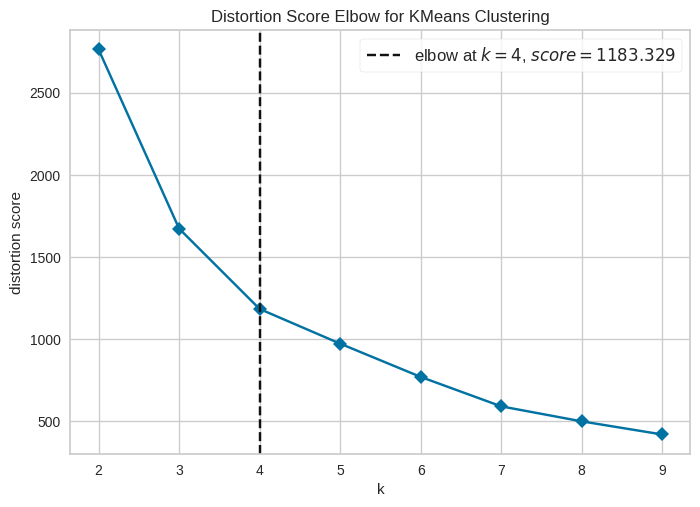

Nilai K optimal menurut Elbow Method: 4


In [20]:
kmeans = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric='distortion', timings=False)
visualizer.fit(df_pca)
visualizer.show()

optimal_k = visualizer.elbow_value_
print(f"Nilai K optimal menurut Elbow Method: {optimal_k}")

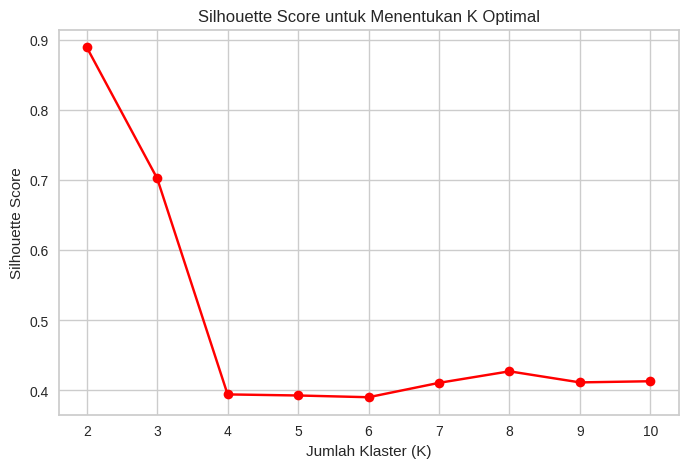

Silhouette Score untuk 2 cluster: 0.8899
Silhouette Score untuk 3 cluster: 0.7027
Silhouette Score untuk 4 cluster: 0.3944
Silhouette Score untuk 5 cluster: 0.3929
Silhouette Score untuk 6 cluster: 0.3904
Silhouette Score untuk 7 cluster: 0.4109
Silhouette Score untuk 8 cluster: 0.4274
Silhouette Score untuk 9 cluster: 0.4116
Silhouette Score untuk 10 cluster: 0.4132


In [21]:
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_pca)
    score = silhouette_score(df_pca, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color="red")
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan K Optimal')
plt.show()

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_pca)
    score = silhouette_score(df_pca, labels)
    print(f"Silhouette Score untuk {k} cluster: {score:.4f}")

**Insight**

Dapat dilihat pada nilai silhouette score dari tiap cluster setelah dilakukan proses PCA, nilai yang diperoleh mengalami kenaikan yakni pada nilai k =3 memiliki nilai silhoutte score menyentung 0.70. Maka nilai k = 3 akan dipilih sebagai nilai k optimal untuk clustering

#### b. Penetepan Jumlah Optimal Clustering

In [22]:
nilai_kluster = 3
kmeans = KMeans(n_clusters=nilai_kluster, random_state=42, n_init=10)

cluster_labels = kmeans.fit_predict(df_fitur)


df_fitur["Cluster"] = cluster_labels

print(df_fitur.head())

    reg_gdp  exp_percap  poorpeople_percentage  life_exp  avg_schooltime  \
0 -0.463997   -0.969316               1.101777 -1.000000        0.642955   
1 -0.457549   -0.451669               1.280129 -0.548318        0.205198   
2 -0.324026   -0.641176               0.352181 -1.187934        0.314637   
3 -0.344145   -0.688871               0.381906 -0.377469        0.746922   
4 -0.105429   -0.514944               0.516317 -0.260011       -0.051984   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


<ipython-input-22-5f5ec64411b8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitur["Cluster"] = cluster_labels


#### c. Visualisasi Hasil Clustering

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi. Visualisasi dilakukan dengan dua metode:

1. Barplot untuk menampilkan perbandingan jumlah data pada setiap cluster
2. Ruang PCA (2D PCA Projection), karena jumlah fitur yang digunakan lebih dari dua, sehingga diperlukan reduksi dimensi agar data dapat divisualisasikan secara dua dimensi dengan tetap mempertahankan informasi utama dari data.

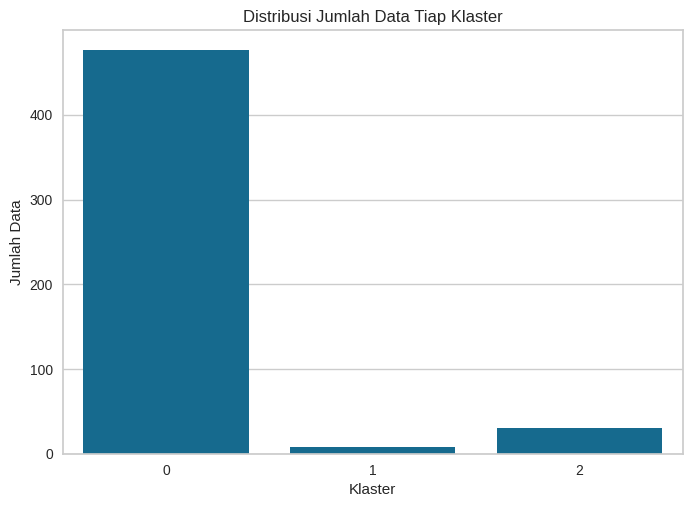

Distribusi Data dalam Setiap Klaster:
Cluster
0    476
2     30
1      8
Name: count, dtype: int64


In [23]:
# @title Barplot
clusters = kmeans.fit_predict(df_pca)

# Buat DataFrame dari hasil PCA untuk visualisasi dan cluster assignment
df_pca_df = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
df_pca_df["Cluster"] = clusters

# Gunakan df_pca_df sebagai sumber data untuk countplot
sns.countplot(x="Cluster", data=df_pca_df)
plt.title("Distribusi Jumlah Data Tiap Klaster")
plt.xlabel("Klaster")
plt.ylabel("Jumlah Data")
plt.show()

print("Distribusi Data dalam Setiap Klaster:")
print(df_pca_df["Cluster"].value_counts())

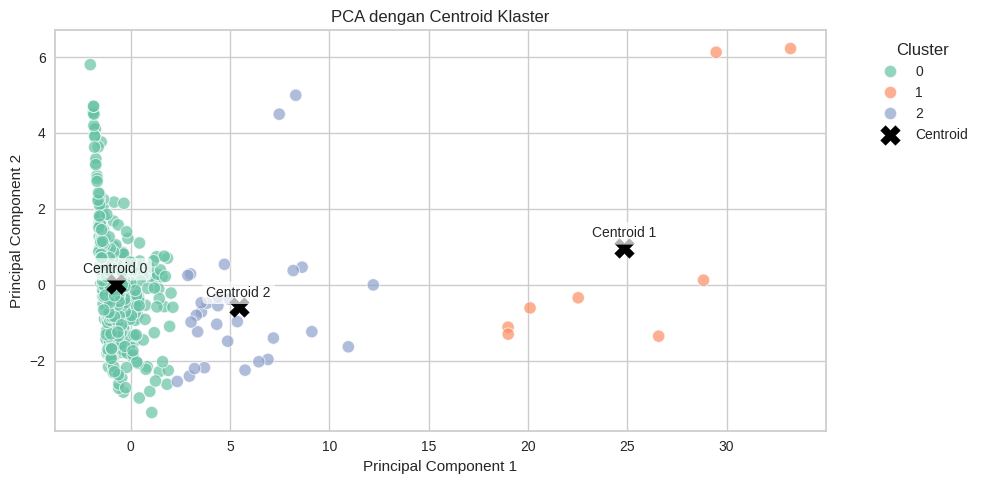

In [24]:
# @title Ruang PCA (2D PCA Projection)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_fitur[fitur_terpilih])

# 2. KMeans di hasil PCA
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_data)

# 3. Buat DataFrame untuk visualisasi
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

# 4. Dapatkan koordinat centroid di ruang PCA
centroids_pca = kmeans.cluster_centers_

# 5. Visualisasi
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    data=df_pca,
    palette="Set2",
    s=80, alpha=0.7
)

# 6. Tambahkan centroid ke plot
plt.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1],
    marker="X", s=200, c="black",
    label="Centroid", edgecolor="black"
)

for i, (x, y) in enumerate(centroids_pca):
    plt.text(x, y + 0.2, f"Centroid {i}", fontsize=10, ha="center", va="bottom",
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='none', facecolor='white', alpha=0.7))

plt.title("PCA dengan Centroid Klaster")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Insight**

Visualisasi PCA menunjukkan bahwa data terbagi ke dalam tiga klaster yang cukup terpisah. Klaster 1 (warna jingga) terlihat memiliki karakteristik ekonomi yang sangat berbeda dibanding dua klaster lainnya, ditunjukkan oleh jarak centroid yang jauh di sisi kanan. Klaster 0 dan 2 memiliki distribusi data yang lebih rapat dan saling berdekatan, namun tetap dapat dibedakan oleh posisi centroid masing-masing. Ini mengindikasikan adanya segmentasi wilayah dengan kondisi ekonomi yang mirip namun tetap berbeda secara signifikan.


#### d. Analisis dan Interpretasi Hasil Cluster

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya.

In [25]:
# @title Inverse Data
# 1. Balik dari PCA space ke data yang sudah di-scale
centroids_scaled = pca.inverse_transform(kmeans.cluster_centers_)

# 2. Balik dari data yang sudah di-scale ke skala asli
centroids_original = scaler.inverse_transform(centroids_scaled)

# 3. Buat DataFrame dengan jumlah baris sesuai jumlah cluster
centroid_df = pd.DataFrame(
    centroids_original,
    columns=fitur_terpilih,
    index=[f'Cluster {i+1}' for i in range(len(centroids_original))]
)

print("Centroid dalam skala asli:")
display(centroid_df)


Centroid dalam skala asli:


,reg_gdp,exp_percap,poorpeople_percentage,life_exp,avg_schooltime
Cluster 1,17.285049,10081.418519,12.544556,69.412563,8.349540
Cluster 2,611.256781,15648.062242,11.166802,73.628726,9.743136
Cluster 3,158.953518,12766.709564,8.261903,71.826505,9.469799


In [26]:
# 1. Ambil kolom yang sudah di-scale dari df_transformed
X_scaled = df_transformed[fitur_terpilih]

# 2. Balikkan ke skala asli
X_original = scaler.inverse_transform(X_scaled)
X_original_df = pd.DataFrame(X_original, columns=fitur_terpilih)

# 3. Gantikan nilai di df_transformed dengan nilai asli
df_transformed[fitur_terpilih] = X_original_df

# 4. Jika kamu punya label (misal: 'cluster' atau 'target'), pastikan itu tetap ada di df_transformed atau ambil dari df awal
# Contoh:
df_transformed['Cluster'] = df_pca['Cluster']  # hanya jika kamu punya kolom label di df asli


In [27]:
df_transformed

,province,cities_reg,poorpeople_percentage,reg_gdp,life_exp,avg_schooltime,exp_percap,Cluster
0,Aceh,Simeulue,18.98,2.275,65.240,9.48,7148.0,0
1,Aceh,Aceh Singkil,20.36,2.425,67.355,8.68,8776.0,0
2,Aceh,Aceh Selatan,13.18,5.531,64.360,8.88,8180.0,0
3,Aceh,Aceh Tenggara,13.41,5.063,68.155,9.67,8030.0,0
4,Aceh,Aceh Timur,14.45,10.616,68.705,8.21,8577.0,0
...,...,...,...,...,...,...,...,...
509,Papua,Puncak,36.26,1.438,66.060,2.16,5412.0,0
510,Papua,Dogiyai,28.81,1.356,65.845,4.94,5415.0,0
511,Papua,Intan Jaya,41.66,1.274,65.580,3.09,5328.0,0
512,Papua,Deiyai,40.59,1.439,65.355,3.25,4673.0,0


In [28]:
# @title Mengeksport Data
df_transformed.to_csv("hasil_clustering.csv", index=False)

## B. Klasifikasi

In [29]:
data=df_transformed.copy()
data

,province,cities_reg,poorpeople_percentage,reg_gdp,life_exp,avg_schooltime,exp_percap,Cluster
0,Aceh,Simeulue,18.98,2.275,65.240,9.48,7148.0,0
1,Aceh,Aceh Singkil,20.36,2.425,67.355,8.68,8776.0,0
2,Aceh,Aceh Selatan,13.18,5.531,64.360,8.88,8180.0,0
3,Aceh,Aceh Tenggara,13.41,5.063,68.155,9.67,8030.0,0
4,Aceh,Aceh Timur,14.45,10.616,68.705,8.21,8577.0,0
...,...,...,...,...,...,...,...,...
509,Papua,Puncak,36.26,1.438,66.060,2.16,5412.0,0
510,Papua,Dogiyai,28.81,1.356,65.845,4.94,5415.0,0
511,Papua,Intan Jaya,41.66,1.274,65.580,3.09,5328.0,0
512,Papua,Deiyai,40.59,1.439,65.355,3.25,4673.0,0


### Memisahkan fitur (X) dan target (y).
Hanya digunakan fitur tanpa kolom Cluster, karena Cluster akan dijadikan target (y)

In [30]:
# @title Pemisahan Fitur dan Target
X = data.drop(columns=['Cluster'])
y = data['Cluster']

print("Data Fitur X:\n", X.head())
print("\nData Fitur y:\n", y.head())

Data Fitur X:
   province     cities_reg  poorpeople_percentage  reg_gdp  life_exp  \
0     Aceh       Simeulue                  18.98    2.275    65.240   
1     Aceh   Aceh Singkil                  20.36    2.425    67.355   
2     Aceh   Aceh Selatan                  13.18    5.531    64.360   
3     Aceh  Aceh Tenggara                  13.41    5.063    68.155   
4     Aceh     Aceh Timur                  14.45   10.616    68.705   

   avg_schooltime  exp_percap  
0            9.48      7148.0  
1            8.68      8776.0  
2            8.88      8180.0  
3            9.67      8030.0  
4            8.21      8577.0  

Data Fitur y:
 0    0
1    0
2    0
3    0
4    0
Name: Cluster, dtype: int32


### Tahap Encoding
Tahap Encoding untuk fitur ketegorical agar dapat dilakukan data splitting, dan akan menggunakan metode One Hot Encoding

In [32]:
kategori_fitur = X.select_dtypes(include=['object']).columns.tolist()

X = pd.get_dummies(X, columns=kategori_fitur, drop_first=True)

print(X.dtypes)

poorpeople_percentage    float64
reg_gdp                  float64
life_exp                 float64
avg_schooltime           float64
exp_percap               float64
                          ...   
cities_reg_Way Kanan        bool
cities_reg_Wonogiri         bool
cities_reg_Wonosobo         bool
cities_reg_Yahukimo         bool
cities_reg_Yalimo           bool
Length: 551, dtype: object


### Melatih model `X_train` dan `y_train`

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1
)

In [34]:
numerical_features=["poorpeople_percentage","reg_gdp", "life_exp", "avg_schooltime", "exp_percap"]
print(X_train[numerical_features].head())

     poorpeople_percentage  reg_gdp  life_exp  avg_schooltime  exp_percap
379                  12.85    2.153    64.510            8.15      8939.0
342                   4.57   13.784    69.570            7.89     11310.0
395                  14.17    2.332    65.620            8.63      7707.0
98                   12.62   14.833    68.090            8.71     10040.0
129                  11.99   71.592    69.825            7.59     11259.0


### Standarisasi data
Standarisasi data pada kolom numerik yang sudah di split, karena akan menggunakan meodel klasifikasi berbasis jarak seperti seperti KNN, SVM

In [35]:
selector = RobustScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print("Data x_train setelah distandarisasi: \n",X_train[numerical_features].head())
print("\nData x_test setelah distandarisasi:\n",X_test[numerical_features].head())

Data x_train setelah distandarisasi: 
      poorpeople_percentage   reg_gdp  life_exp  avg_schooltime  exp_percap
379               0.330357 -0.471897 -1.171706       -0.075067   -0.429196
342              -0.725765  0.020004 -0.078834       -0.214477    0.368315
395               0.498724 -0.464326 -0.931965        0.182306   -0.843592
98                0.301020  0.064369 -0.398488        0.225201   -0.058863
129               0.220663  2.464834 -0.023758       -0.375335    0.351160

Data x_test setelah distandarisasi:
      poorpeople_percentage   reg_gdp  life_exp  avg_schooltime  exp_percap
22                0.942602 -0.486657 -1.276458       -0.139410   -0.951900
282               0.536990  0.052950 -0.597192       -1.002681    0.376387
134              -0.019133 -0.090252  0.058315        0.053619    0.029263
427               0.063776 -0.127173 -0.187905       -0.134048   -0.640767
500               0.456633 -0.438486 -0.751620        0.289544   -1.210225


### SMOTE
Untuk menyeimbangkan jumlah data antar klaster agar model klasifikasi tidak bias terhadap klaster yang dominan.

In [36]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Training Model

Setiap model dilatih untuk mengenali pola dalam data agar bisa memprediksi cluster (yang sebelumnya diperoleh dari proses clustering).

In [37]:
knn = KNeighborsClassifier().fit(X_train_resampled, y_train_resampled)
dt = DecisionTreeClassifier(random_state=42).fit(X_train_resampled, y_train_resampled)
rf = RandomForestClassifier(random_state=42).fit(X_train_resampled, y_train_resampled)
svm = SVC(random_state=42).fit(X_train_resampled, y_train_resampled)
nb = GaussianNB().fit(X_train_resampled, y_train_resampled)

print("Model training selesai!")

Model training selesai!


### Evaluasi Model

_______ Klasifikasi KNN _______
Confusion Matrix:
[[95  0  0]
 [ 0  2  0]
 [ 0  0  6]]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

----------------------------------------



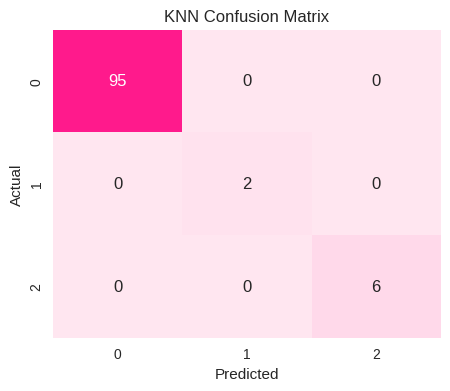

In [38]:
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print("_______ Klasifikasi KNN _______")
print("Confusion Matrix:")
print(cm_knn)
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn, average='weighted'):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
from matplotlib.colors import LinearSegmentedColormap

pink_cmap = LinearSegmentedColormap.from_list("pink_cmap", ["#ffe6f0", "#ffb3d9", "#ff80bf", "#ff4da6", "#ff1a8c"])
sns.heatmap(cm_knn, annot=True, fmt='d', cmap=pink_cmap, cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Interpretasi KNN Confusion Matrix**

Model KNN menunjukkan performa dalam mengklasifikasikan data ke dalam empat kelas. Dari confusion matrix, kita dapat melihat beberapa poin penting:

- Kelas 0:

  - 95 sampel diprediksi dengan benar sebagai kelas 0 (True Positive). Tidak ada sampel yang terprediksi salah.

- Kelas 1:
  - 2 sampel diprediksi dengan benar sebagai kelas 1 (True Positive). Tidak ada sampel yang terprediksi salah.

- Kelas 2:
  - 6 sampel diprediksi dengan benar sebagai kelas 2 (True Positive). Tidak ada sampel yang terprediksi salah.

Secara keseluruhan, model memiliki performa yang sangat baik, namun berpotensi overfitting.

_______Klasifikasi SVM_______
Confusion Matrix:
[[92  0  3]
 [ 0  2  0]
 [ 0  0  6]]
Accuracy: 0.9709
Precision: 0.9806
Recall: 0.9709
F1-Score: 0.9736

----------------------------------------



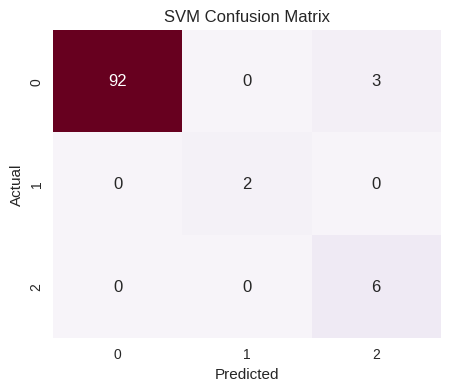

In [39]:
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)

print("_______Klasifikasi SVM_______")
print("Confusion Matrix:")
print(cm_svm)
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm, average='weighted'):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='PuRd', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Interpretasi SVM Confusion Matrix**

Model SVM menunjukkan performa dalam mengklasifikasikan data ke dalam empat kelas. Dari confusion matrix, kita dapat melihat beberapa poin penting:

- Kelas 0:
  - 92 sampel diprediksi dengan benar sebagai kelas 0 (True Positive) dan 3 yang terprediksi sebagai kelas 2 (False Negative)

- Kelas 1:
  - 2 sampel diprediksi dengan benar sebagai kelas 1 (True Positive). Tidak ada sampel yang terprediksi salah.

- Kelas 2:
  - 6 sampel diprediksi dengan benar sebagai kelas 2 (True Positive). Tidak ada sampel yang terprediksi salah.

Secara keseluruhan, model memiliki performa yang baik, hanya terdapat kesalahan memprediksi kelas 0

_______ Klasifikasi Decision Tree _______
Confusion Matrix:
[[95  0  0]
 [ 0  2  0]
 [ 0  0  6]]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

----------------------------------------



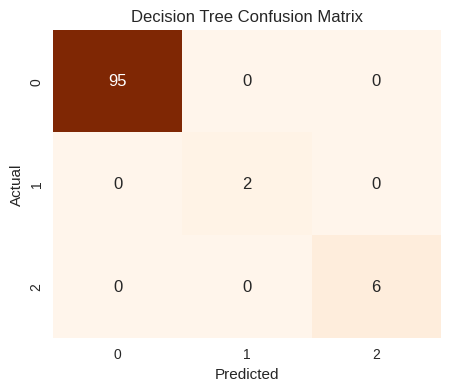

In [40]:
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("_______ Klasifikasi Decision Tree _______")
print("Confusion Matrix:")
print(cm_dt)
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt, average='weighted'):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Interpretasi Decision Tree Confusion Matrix**

Model Decision Tree menunjukkan performa dalam mengklasifikasikan data ke dalam tiga kelas. Dari confusion matrix, kita dapat melihat beberapa poin penting:

- Kelas 0:
  - 95 sampel diprediksi dengan benar sebagai kelas 0 (True Positive)

- Kelas 1:
  - 2 sampel diprediksi dengan benar sebagai kelas 1 (True Positive). Tidak ada sampel yang terprediksi salah.

- Kelas 2:
  - 6 sampel diprediksi dengan benar sebagai kelas 2 (True Positive). Tidak ada sampel yang terprediksi salah.

Secara keseluruhan, model memiliki performa yang sangat baik, namun kemungkinan mengalami overfitting

_______ Klasifikasi Random Forest _______
Confusion Matrix:
[[95  0  0]
 [ 0  1  1]
 [ 0  0  6]]
Accuracy: 0.9903
Precision: 0.9917
Recall: 0.9903
F1-Score: 0.9890

----------------------------------------



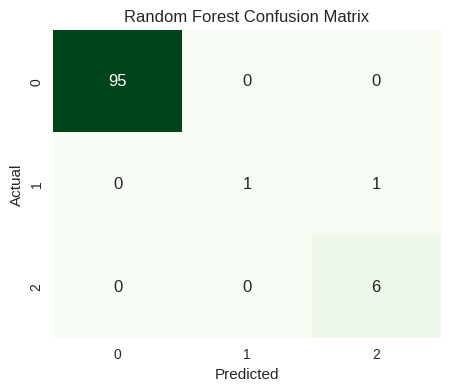

In [41]:
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("_______ Klasifikasi Random Forest _______")
print("Confusion Matrix:")
print(cm_rf)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Interpretasi Random Forest Confusion Matrix**

Model Random Forest menunjukkan performa dalam mengklasifikasikan data ke dalam tiga kelas. Dari confusion matrix, kita dapat melihat beberapa poin penting:

- Kelas 0:
  - 95 sampel diprediksi dengan benar sebagai kelas 0 (True Positive). Tidak ada sampel yang terprediksi salah.

- Kelas 1:
  - 1 sampel diprediksi dengan benar sebagai kelas 1 (True Positive). 1 sampel diprediksi salah dengan kelas 2 (False Negative).

- Kelas 2:
  - 6 sampel diprediksi dengan benar sebagai kelas 2 (True Positive). Tidak ada sampel yang terprediksi salah.

Secara keseluruhan, model memiliki performa yang baik

_________ Klasifikasi Naive Bayes Classifier _________
Confusion Matrix:
[[57  0 38]
 [ 0  1  1]
 [ 0  0  6]]
Accuracy: 0.6214
Precision: 0.9495
Recall: 0.6214
F1-Score: 0.7184

----------------------------------------



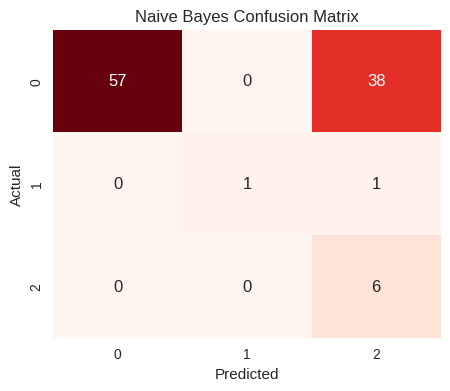

In [42]:
y_pred_nb = nb.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)

print("_________ Klasifikasi Naive Bayes Classifier _________")
print("Confusion Matrix:")
print(cm_nb)
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb, average='weighted'):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Interpretasi Naive Bayes Confusion Matrix**

Model Naive Bayes menunjukkan performa dalam mengklasifikasikan data ke dalam tiga kelas. Dari confusion matrix, kita dapat melihat beberapa poin penting:

- Kelas 0:
  - 57 sampel diprediksi dengan benar sebagai kelas 0 (True Positive). 38 sampel diprediksi salah dengan kelas 2 (False Negative).

- Kelas 1:
  - 1 sampel diprediksi dengan benar sebagai kelas 1 (True Positive). 1 sampel diprediksi salah dengan kelas 2 (False Negative).

- Kelas 2:
  - 6 sampel diprediksi dengan benar sebagai kelas 2 (True Positive). Tidak ada sampel yang terprediksi salah.

Secara keseluruhan, model memiliki performa yang cukup baik

In [53]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-Score': f1_score(y_test, y_pred, average='macro')
    }

    return results

models = {
    'K-Nearest Neighbors (KNN)': knn,
    'Decision Tree (DT)': dt,
    'Random Forest (RF)': rf,
    'Support Vector Machine (SVM)': svm,
    'Naive Bayes (NB)': nb
}


summary_df = pd.DataFrame([
    {'Model': name, **evaluate_model(model, X_test, y_test)}
    for name, model in models.items()
])

print(summary_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']])

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  1.000000   1.000000  1.000000  1.000000
1            Decision Tree (DT)  1.000000   1.000000  1.000000  1.000000
2            Random Forest (RF)  0.990291   0.952381  0.833333  0.863248
3  Support Vector Machine (SVM)  0.970874   0.888889  0.989474  0.927986
4              Naive Bayes (NB)  0.621359   0.711111  0.700000  0.550654
